In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from scipy import stats

In [3]:
# Read CSV files for each country
benin_file_path = '../data/benin-malanville.csv'
df_benin = pd.read_csv(benin_file_path)

togo_file_path = '../data/sierraleone-bumbuna.csv'
df_togo = pd.read_csv(togo_file_path)

sierraleone_file_path = '../data/togo-dapaong_qc.csv'
df_sierraleone = pd.read_csv(sierraleone_file_path)

In [4]:
# to see the overview of the data
print(df_benin.head())
print(df_togo.head())
print(df_togo.head())

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
          Timestamp 

In [5]:
# to see the data types of the data
print(df_benin.dtypes)
print(df_togo.dtypes)
print(df_sierraleone.dtypes)

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object
Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object
Timestamp         obje

In [6]:
df_benin.info()
df_togo.info()
df_sierraleone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [7]:

columns_to_exclude = ['Timestamp', 'Cleaning', 'Comments']
columns_to_exclude_for_mode = ['Timestamp', 'Comments']

In [8]:
df_benin_filtered = df_benin.drop(columns= columns_to_exclude)
df_togo_filtered = df_togo.drop(columns= columns_to_exclude)
df_sierraleone_filtered = df_sierraleone.drop(columns= columns_to_exclude)
df_benin_mode_filtered = df_benin.drop(columns = columns_to_exclude_for_mode)
df_togo_filtered = df_togo.drop(columns = columns_to_exclude_for_mode)
df_sierraleone_filtered = df_sierraleone.drop(columns = columns_to_exclude_for_mode)

In [9]:
benin_mean = df_benin_filtered.mean()
benin_median = df_benin_filtered.median()
benin_mode = df_benin_mode_filtered.mode().iloc[0]
benin_standard_deviation = df_benin_filtered.std()

togo_mean = df_togo_filtered.mean()
togo_median = df_togo_filtered.median()
togo_mode = df_togo_filtered.mode().iloc[0]
togo_standard_deviation = df_togo_filtered.std()

sierraleone_mean = df_sierraleone_filtered.mean()
sierraleone_median = df_sierraleone_filtered.median()
sierraleone_mode = df_sierraleone_filtered.mode().iloc[0]
sierraleone_standard_deviation = df_sierraleone_filtered.std()

In [10]:
print(benin_mean)
print(benin_median)
print(benin_mode)
print(benin_standard_deviation)

GHI              240.559452
DNI              167.187516
DHI              115.358961
ModA             236.589496
ModB             228.883576
Tamb              28.179683
RH                54.487969
WS                 2.121113
WSgust             2.809195
WSstdev            0.473390
WD               153.435172
WDstdev            8.582407
BP               994.197199
Precipitation      0.001905
TModA             35.246026
TModB             32.471736
dtype: float64
GHI                1.8
DNI               -0.1
DHI                1.6
ModA               4.5
ModB               4.3
Tamb              28.0
RH                55.1
WS                 1.9
WSgust             2.6
WSstdev            0.5
WD               181.0
WDstdev            8.6
BP               994.0
Precipitation      0.0
TModA             30.0
TModB             28.9
dtype: float64
GHI               -1.5
DNI               -0.3
DHI               -1.4
ModA               0.0
ModB               0.0
Tamb              24.9
RH              

In [11]:
print(togo_mean)
print(togo_median)
print(togo_mode)
print(togo_standard_deviation)

GHI              201.957515
DNI              116.376337
DHI              113.720571
ModA             206.643095
ModB             198.114691
Tamb              26.319394
RH                79.448857
WS                 1.146113
WSgust             1.691606
WSstdev            0.363823
WD               133.044668
WDstdev            7.172220
BP               999.876469
Cleaning           0.000967
Precipitation      0.004806
TModA             32.504263
TModB             32.593091
dtype: float64
GHI                 0.3
DNI                -0.1
DHI                -0.1
ModA                3.6
ModB                3.4
Tamb               25.3
RH                 85.4
WS                  0.8
WSgust              1.6
WSstdev             0.4
WD                161.5
WDstdev             6.2
BP               1000.0
Cleaning            0.0
Precipitation       0.0
TModA              26.6
TModB              26.9
dtype: float64
GHI                -0.8
DNI                -0.1
DHI                -1.2
ModA          

In [12]:
print(sierraleone_mean)
print(sierraleone_median)
print(sierraleone_mode)
print(sierraleone_standard_deviation)

GHI              230.555040
DNI              151.258469
DHI              116.444352
ModA             226.144375
ModB             219.568588
Tamb              27.751788
RH                55.013160
WS                 2.368093
WSgust             3.229490
WSstdev            0.557740
WD               161.741845
WDstdev           10.559568
BP               975.915242
Cleaning           0.000535
Precipitation      0.001382
TModA             32.444403
TModB             33.543330
dtype: float64
GHI                2.1
DNI                0.0
DHI                2.5
ModA               4.4
ModB               4.3
Tamb              27.2
RH                59.3
WS                 2.2
WSgust             2.9
WSstdev            0.5
WD               199.1
WDstdev           10.8
BP               976.0
Cleaning           0.0
Precipitation      0.0
TModA             28.4
TModB             28.4
dtype: float64
GHI               -1.9
DNI                0.0
DHI                0.0
ModA               0.0
ModB       

In [13]:
print(df_benin_filtered.describe())

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.2000

In [14]:
# List of columns to check for missing values
columns_to_check = ['GHI', 'DNI', 'DHI']

# Check for missing values in these columns
missing_values_specific = df_benin[columns_to_check].isnull().sum()

# Print missing values for these specific columns
print("\nMissing values in GHI, DNI, DHI:\n", missing_values_specific)


Missing values in GHI, DNI, DHI:
 GHI    0
DNI    0
DHI    0
dtype: int64


In [15]:
# Check for negative values in columns that should be positive
negative_values = df_benin[df_benin[['GHI', 'DNI', 'DHI']] < 0].count()

# Print count of negative values for each column
print("\nNegative values count in GHI, DNI, DHI:\n", negative_values)


Negative values count in GHI, DNI, DHI:
 Timestamp             0
GHI              258847
DNI              275987
DHI              259182
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments              0
dtype: int64


In [16]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outlier_mask = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
        outliers[col] = df[outlier_mask].shape[0]  # Number of outliers
    return outliers

# List of columns to check for outliers
columns_with_outliers = ['ModA', 'ModB', 'WS', 'WSgust']

# Detect outliers in specified columns
beni_outliers_count = detect_outliers_iqr(df_benin, columns_with_outliers)

# Print count of outliers for each column
print("\nOutliers count in ModA, ModB, WS, WSgust:\n", beni_outliers_count)


Outliers count in ModA, ModB, WS, WSgust:
 {'ModA': 98, 'ModB': 240, 'WS': 6717, 'WSgust': 5368}


/tmp/ipykernel_23721/3053995632.py:39: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly_avg = df.resample('M').mean()


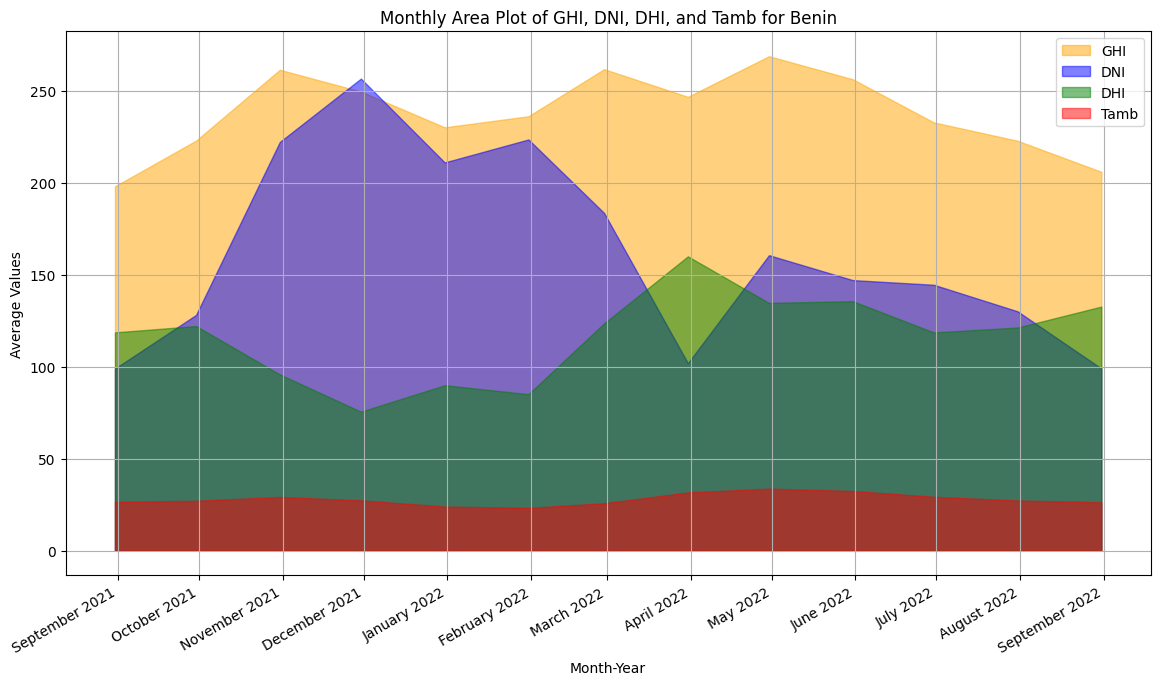

/tmp/ipykernel_23721/3053995632.py:39: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly_avg = df.resample('M').mean()


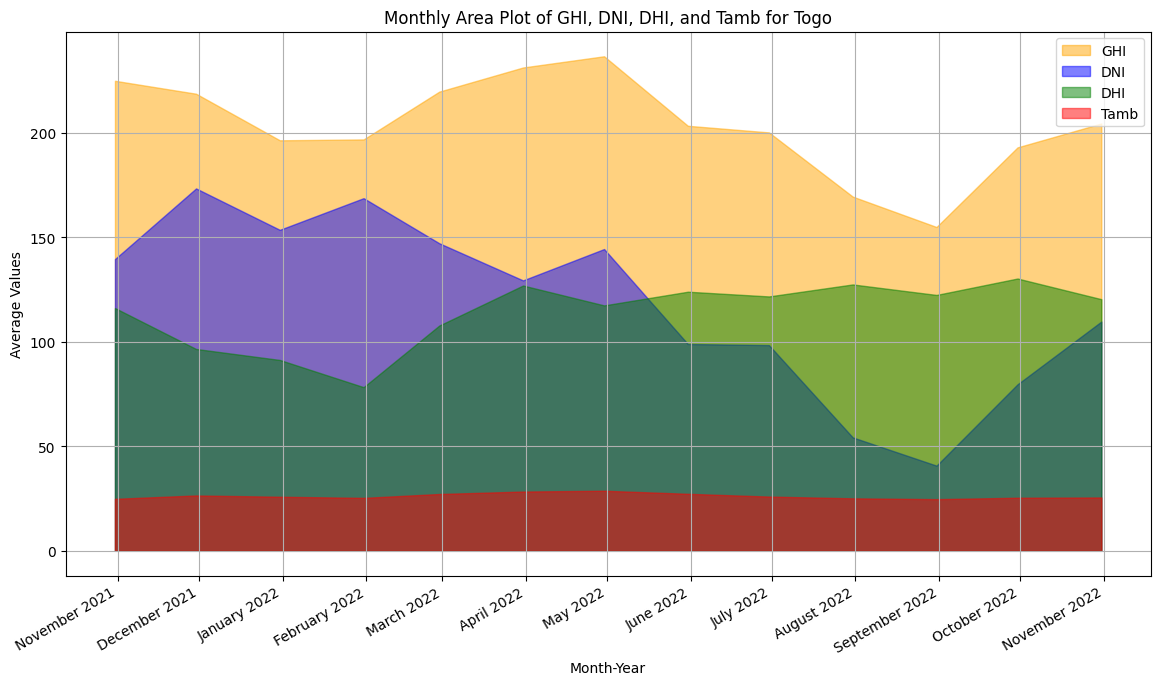

/tmp/ipykernel_23721/3053995632.py:39: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly_avg = df.resample('M').mean()


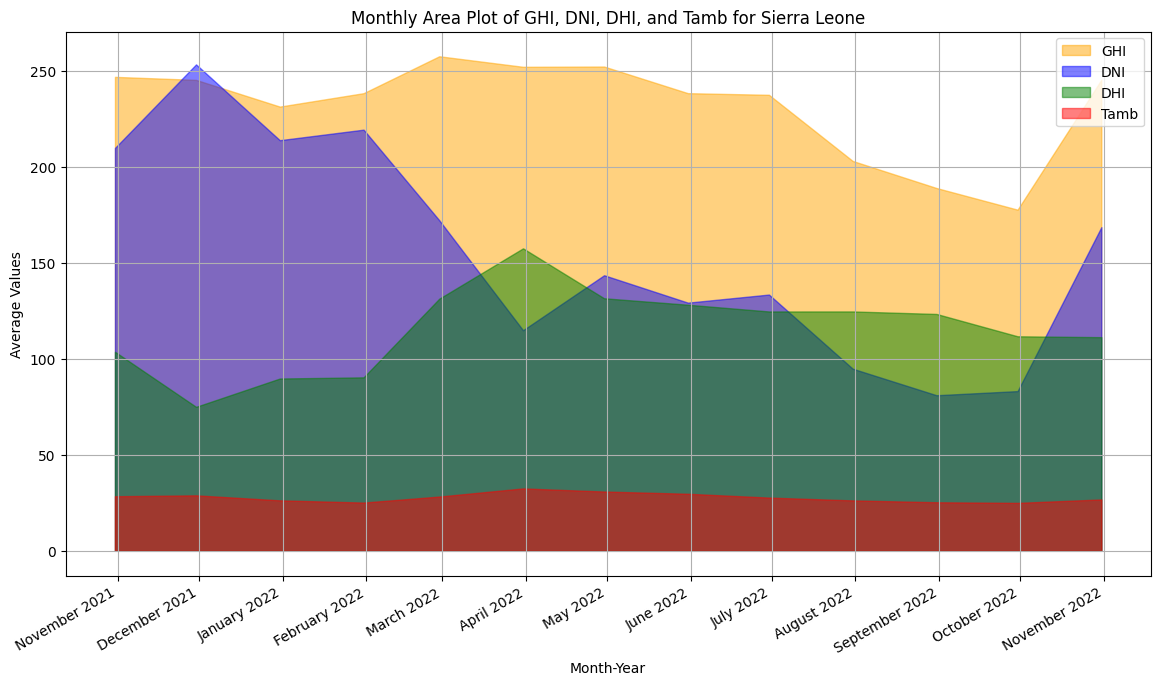

In [20]:
def plot_monthly_area_plots(df, timestamp_col='Timestamp', ghi_col='GHI', dni_col='DNI', dhi_col='DHI', tamb_col='Tamb', start_date=None, end_date=None, title="Monthly Area Plot of GHI, DNI, DHI, and Tamb"):
    """
    Plots area graphs for GHI, DNI, DHI, and Tamb columns, showing patterns by month.

    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    timestamp_col (str): Name of the column containing the timestamps.
    ghi_col (str): Name of the column for GHI values. Default is 'GHI'.
    dni_col (str): Name of the column for DNI values. Default is 'DNI'.
    dhi_col (str): Name of the column for DHI values. Default is 'DHI'.
    tamb_col (str): Name of the column for Tamb values. Default is 'Tamb'.
    start_date (str): Start date for the plot. Default is None.
    end_date (str): End date for the plot. Default is None.
    """

    # Ensure the Timestamp column is a datetime type and set it as the index
    if not pd.api.types.is_datetime64_any_dtype(df[timestamp_col]):
        df[timestamp_col] = pd.to_datetime(df[timestamp_col], errors='coerce')
    df.set_index(timestamp_col, inplace=True)

    # Filter the dataframe by the specified date range
    if start_date and end_date:
        df = df.loc[start_date:end_date]

    # Convert numeric columns to float, forcing errors to NaN
    df[ghi_col] = pd.to_numeric(df[ghi_col], errors='coerce')
    df[dni_col] = pd.to_numeric(df[dni_col], errors='coerce')
    df[dhi_col] = pd.to_numeric(df[dhi_col], errors='coerce')
    df[tamb_col] = pd.to_numeric(df[tamb_col], errors='coerce')

    # Drop rows with NaN values in any of the columns
    df = df.dropna(subset=[ghi_col, dni_col, dhi_col, tamb_col])

    # Resample the DataFrame to get monthly averages
    df_monthly_avg = df.resample('M').mean()

    # Plot area graphs for GHI, DNI, DHI, and Tamb
    plt.figure(figsize=(14, 8))

    # Area plots for each variable
    plt.fill_between(df_monthly_avg.index, df_monthly_avg[ghi_col], label='GHI', color='orange', alpha=0.5)
    plt.fill_between(df_monthly_avg.index, df_monthly_avg[dni_col], label='DNI', color='blue', alpha=0.5)
    plt.fill_between(df_monthly_avg.index, df_monthly_avg[dhi_col], label='DHI', color='green', alpha=0.5)
    plt.fill_between(df_monthly_avg.index, df_monthly_avg[tamb_col], label='Tamb', color='red', alpha=0.5)

    # Format the x-axis to show month and year in "April 2024" format
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B %Y'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

    # Rotate and align the x labels for better readability
    plt.gcf().autofmt_xdate()

    # Add titles and labels
    plt.title(title)
    plt.xlabel('Month-Year')
    plt.ylabel('Average Values')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()

# Plot the monthly area graph for each data:
benin_file_path = '../data/benin-malanville.csv'
df_benin = pd.read_csv(benin_file_path)

togo_file_path = '../data/sierraleone-bumbuna.csv'
df_togo = pd.read_csv(togo_file_path)

sierraleone_file_path = '../data/togo-dapaong_qc.csv'
df_sierraleone = pd.read_csv(sierraleone_file_path)

plot_monthly_area_plots(df_benin, title="Monthly Area Plot of GHI, DNI, DHI, and Tamb for Benin")
print("\n")
plot_monthly_area_plots(df_togo, title="Monthly Area Plot of GHI, DNI, DHI, and Tamb for Togo")
print("\n")
plot_monthly_area_plots(df_sierraleone, title="Monthly Area Plot of GHI, DNI, DHI, and Tamb for Sierra Leone")

/tmp/ipykernel_23721/2293563074.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()
/tmp/ipykernel_23721/2293563074.py:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cleaning_monthly = df.resample('M')[cleaning_col].sum()


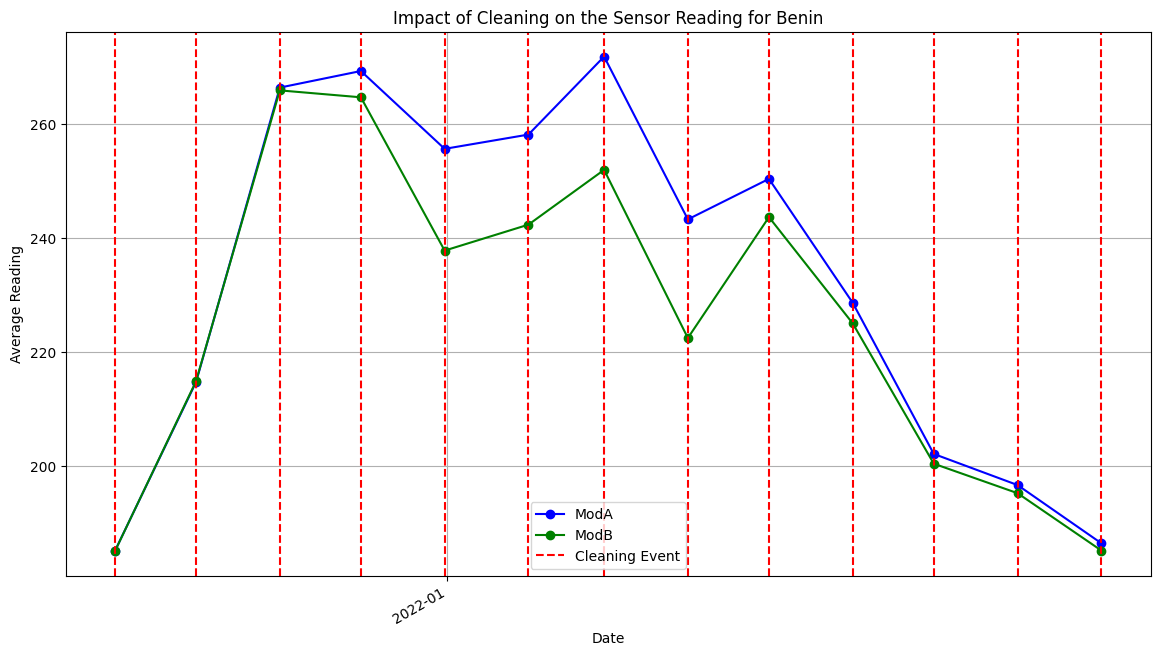

/tmp/ipykernel_23721/2293563074.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()
/tmp/ipykernel_23721/2293563074.py:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cleaning_monthly = df.resample('M')[cleaning_col].sum()


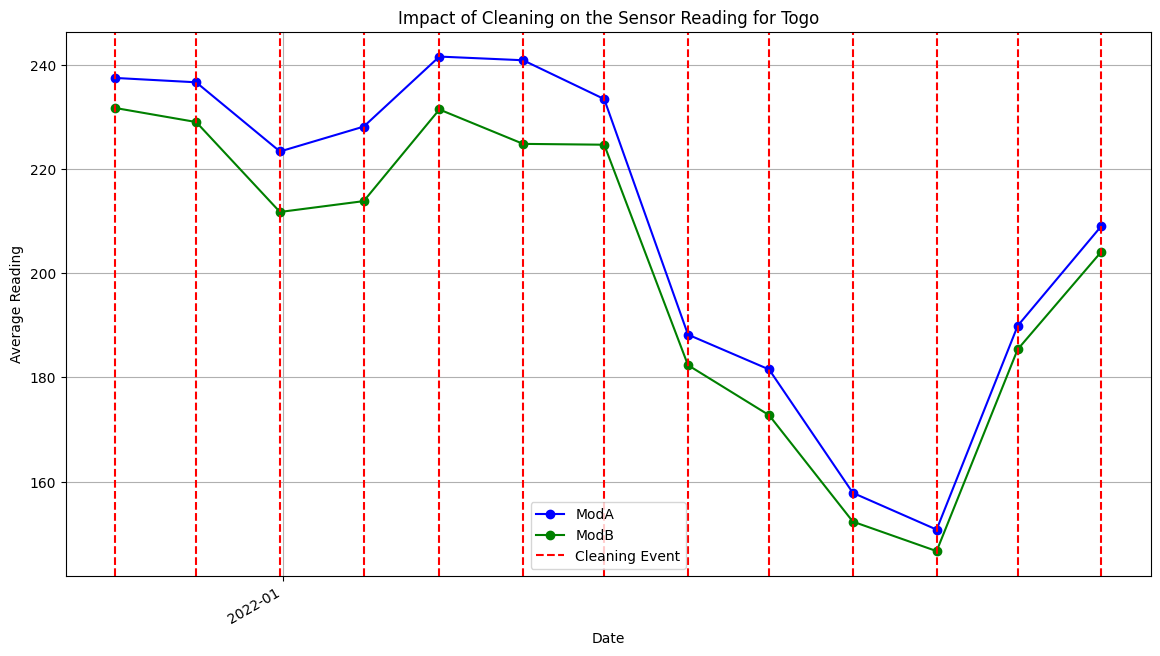

/tmp/ipykernel_23721/2293563074.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()
/tmp/ipykernel_23721/2293563074.py:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cleaning_monthly = df.resample('M')[cleaning_col].sum()


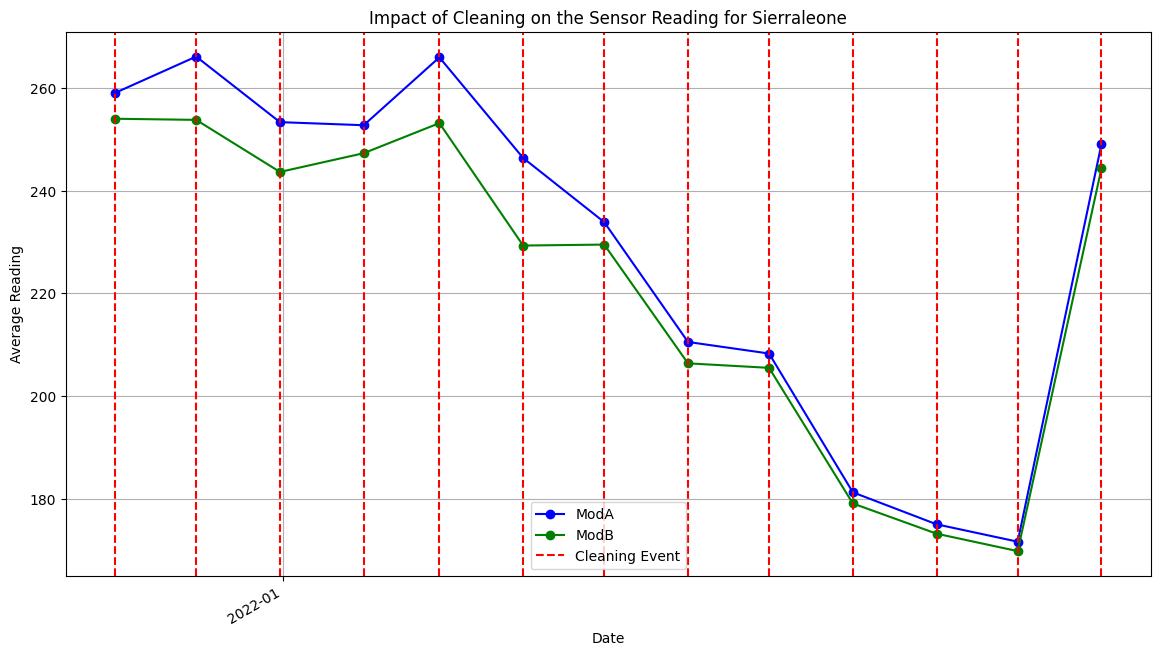

In [22]:
def evaluate_cleaning_impact_monthly(df, cleaning_col='Cleaning', modA_col='ModA', modB_col='ModB', title ='Impact of Cleaning on the Sensor Reading'):
    """
    Evaluates the impact of cleaning on sensor readings (ModA, ModB) over time using monthly averages.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the data with Timestamp as the index.
    cleaning_col (str): Name of the column indicating cleaning events.
    modA_col (str): Name of the column for ModA sensor readings.
    modB_col (str): Name of the column for ModB sensor readings.
    """
    
    # Ensure the index is a datetime type
    if not pd.api.types.is_datetime64_any_dtype(df.index):
        df.index = pd.to_datetime(df.index, errors='coerce')
    
    # Convert numeric columns to float, forcing errors to NaN
    df[modA_col] = pd.to_numeric(df[modA_col], errors='coerce')
    df[modB_col] = pd.to_numeric(df[modB_col], errors='coerce')

    # Create a binary column to indicate whether cleaning occurred (1) or not (0)
    df[cleaning_col] = df[cleaning_col].fillna(0).astype(int)

    # Resample the data to monthly frequency and calculate mean values for ModA and ModB
    df_monthly = df.resample('M').mean()

    # Create a DataFrame to record cleaning events for each month
    cleaning_monthly = df.resample('M')[cleaning_col].sum()

    # Plot ModA and ModB readings over time with cleaning events
    plt.figure(figsize=(14, 8))

    # Plot ModA and ModB sensor readings
    plt.plot(df_monthly.index, df_monthly[modA_col], label='ModA', color='blue', linestyle='-', marker='o')
    plt.plot(df_monthly.index, df_monthly[modB_col], label='ModB', color='green', linestyle='-', marker='o')

    # Highlight cleaning events with vertical lines
    for date, cleaning_count in cleaning_monthly.items():
        if cleaning_count > 0:  # If cleaning events occurred in that month
            plt.axvline(x=date, color='red', linestyle='--', label='Cleaning Event' if 'Cleaning Event' not in plt.gca().get_legend_handles_labels()[1] else "")

    # Format the x-axis to show year and month
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())

    # Rotate and align the x labels for better readability
    plt.gcf().autofmt_xdate()

    # Add titles and labels
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Average Reading')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()
evaluate_cleaning_impact_monthly(df_benin, title='Impact of Cleaning on the Sensor Reading for Benin')
evaluate_cleaning_impact_monthly(df_togo, title='Impact of Cleaning on the Sensor Reading for Togo')
evaluate_cleaning_impact_monthly(df_sierraleone, title='Impact of Cleaning on the Sensor Reading for Sierraleone')

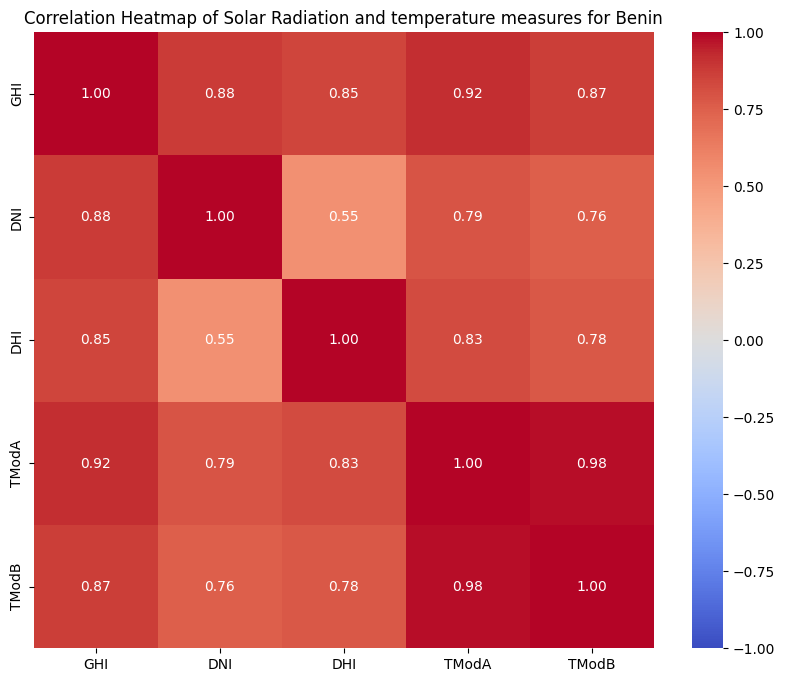

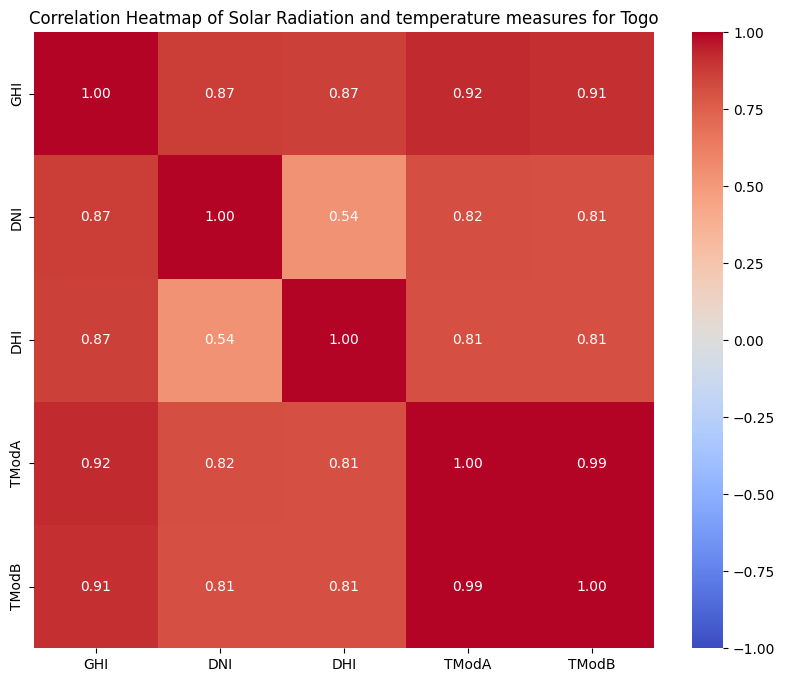

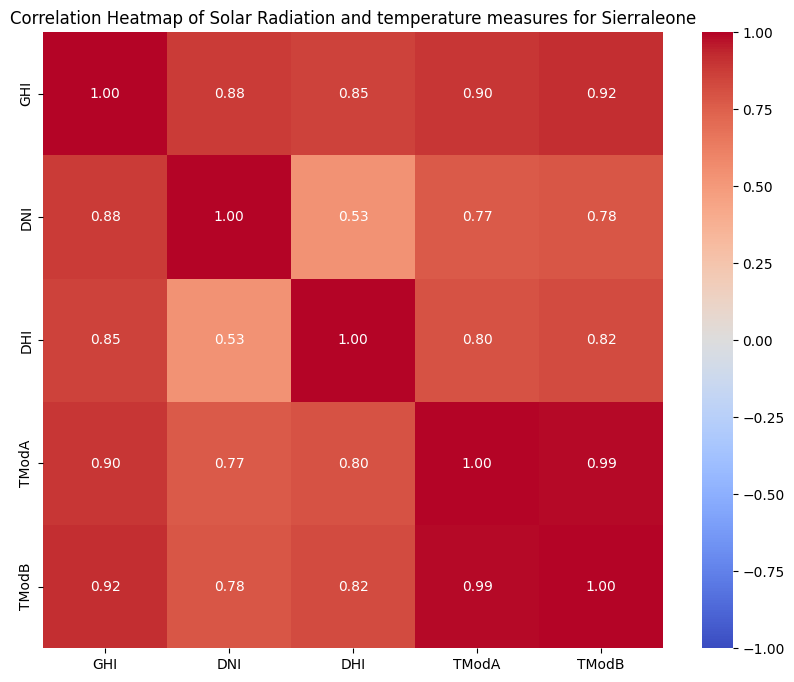

In [23]:


def plot_correlation_heatmap(df, cols, title='Correlation Heatmap of Solar Radiation and temperature measures '):
    """
    Plots a heatmap of correlations between specified columns in the DataFrame.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    cols (list): List of columns to include in the correlation heatmap.
    """
    # Compute the correlation matrix
    correlation_matrix = df[cols].corr()
    
    # Create a heatmap of the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
    plt.title(title)
    plt.show()


# Plot correlation heatmap for solar radiation components and temperature measures
plot_correlation_heatmap(df_benin, ['GHI', 'DNI', 'DHI', 'TModA', 'TModB'], title='Correlation Heatmap of Solar Radiation and temperature measures for Benin')
plot_correlation_heatmap(df_togo, ['GHI', 'DNI', 'DHI', 'TModA', 'TModB'], title='Correlation Heatmap of Solar Radiation and temperature measures for Togo')
plot_correlation_heatmap(df_sierraleone, ['GHI', 'DNI', 'DHI', 'TModA', 'TModB'], title='Correlation Heatmap of Solar Radiation and temperature measures for Sierraleone')

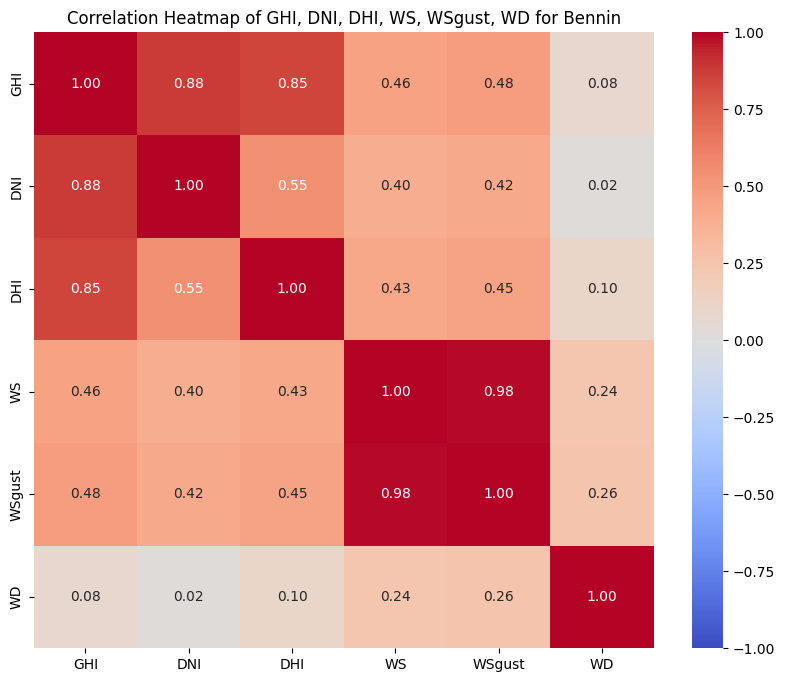

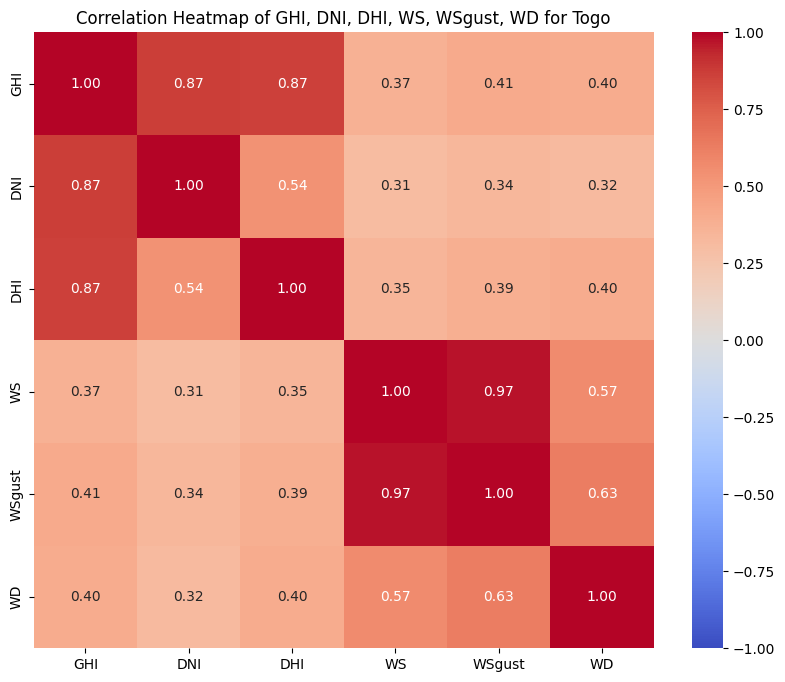

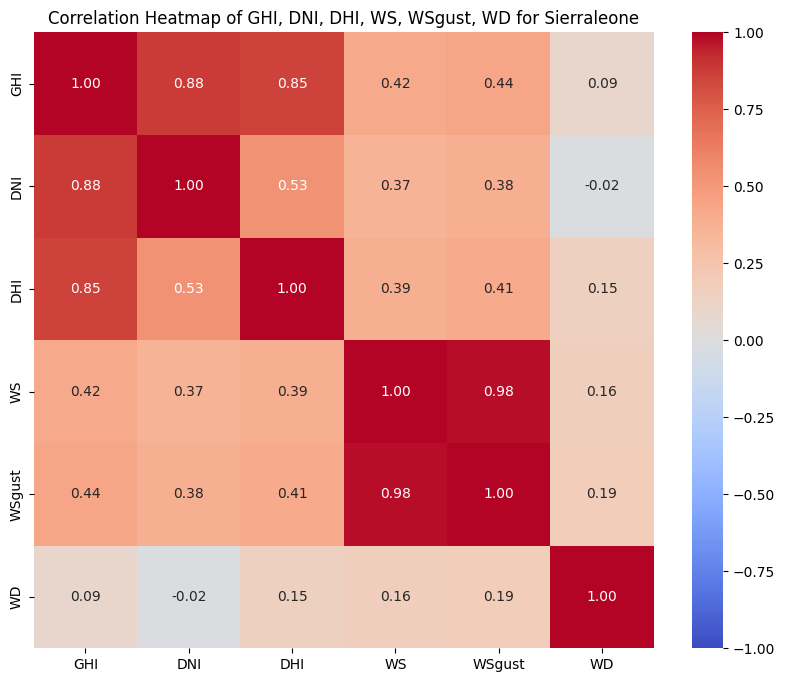

In [25]:
def plot_correlation_heatmap(df, cols, title='Correlation Heatmap of GHI, DNI, DHI, WS, WSgust, WD'):
    """
    Plots a heatmap of correlations between specified columns in the DataFrame.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    cols (list): List of columns to include in the correlation heatmap.
    """
    # Compute the correlation matrix
    correlation_matrix = df[cols].corr()
    
    # Create a heatmap of the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
    plt.title(title)
    plt.show()

# Plot correlation heatmap for solar radiation components and wind conditions
plot_correlation_heatmap(df_benin, ['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'WD'], title='Correlation Heatmap of GHI, DNI, DHI, WS, WSgust, WD for Bennin')
plot_correlation_heatmap(df_togo, ['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'WD'], title='Correlation Heatmap of GHI, DNI, DHI, WS, WSgust, WD for Togo')
plot_correlation_heatmap(df_sierraleone, ['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'WD'], title='Correlation Heatmap of GHI, DNI, DHI, WS, WSgust, WD for Sierraleone')

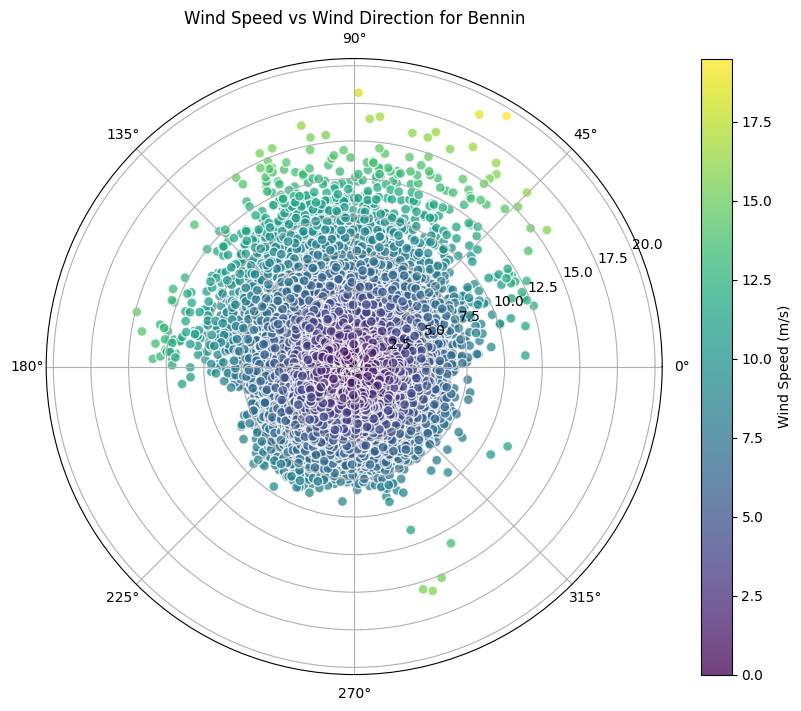

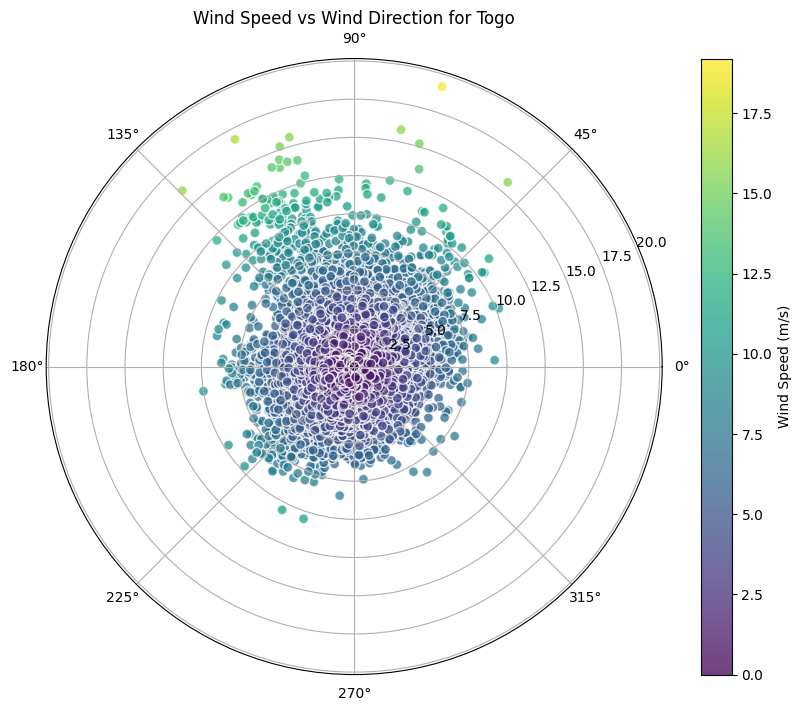

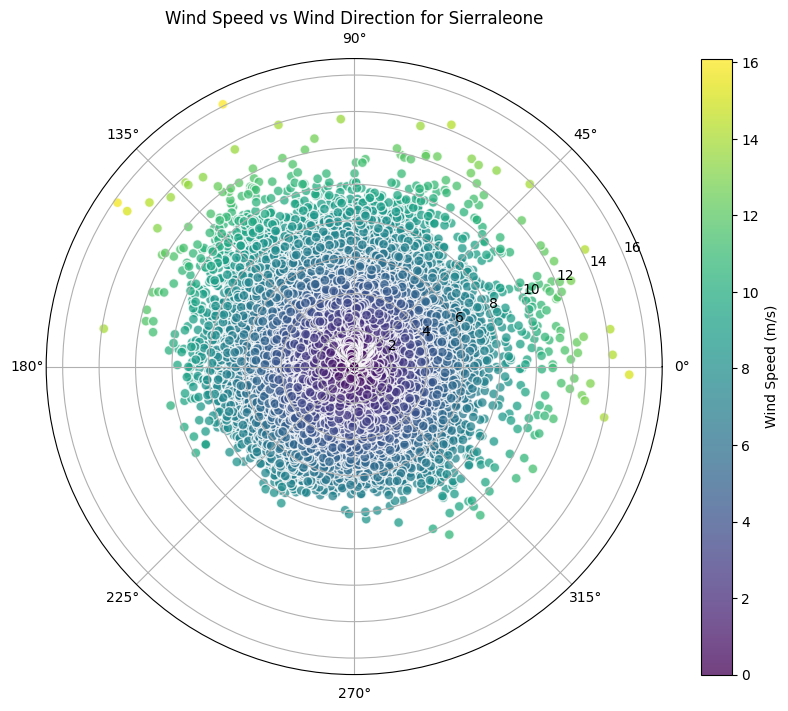

In [28]:
def plot_wind_polar(df, wind_speed_col='WS', wind_direction_col='WD', title='Wind Speed vs Wind Direction'):
    """
    Plots a polar plot of wind speed versus wind direction.

    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    wind_speed_col (str): Name of the column containing wind speed values.
    wind_direction_col (str): Name of the column containing wind direction values.
    title (str): Title of the polar plot.
    """
    # Convert wind direction to radians
    wind_direction_rad = np.deg2rad(df[wind_direction_col])
    
    # Create the polar plot
    plt.figure(figsize=(10, 8))
    ax = plt.subplot(111, polar=True)
    
    # Plot wind speed against wind direction
    sc = ax.scatter(wind_direction_rad, df[wind_speed_col], c=df[wind_speed_col], cmap='viridis', alpha=0.75, edgecolors='w', s=50)
    ax.set_title(title)
    
    # Add colorbar
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Wind Speed (m/s)')
    
    plt.show()

# Plot wind speed vs wind direction using polar plot
plot_wind_polar(df_benin, wind_speed_col='WS', wind_direction_col='WD', title='Wind Speed vs Wind Direction for Bennin')
plot_wind_polar(df_togo, wind_speed_col='WS', wind_direction_col='WD', title='Wind Speed vs Wind Direction for Togo')
plot_wind_polar(df_sierraleone, wind_speed_col='WS', wind_direction_col='WD', title='Wind Speed vs Wind Direction for Sierraleone')

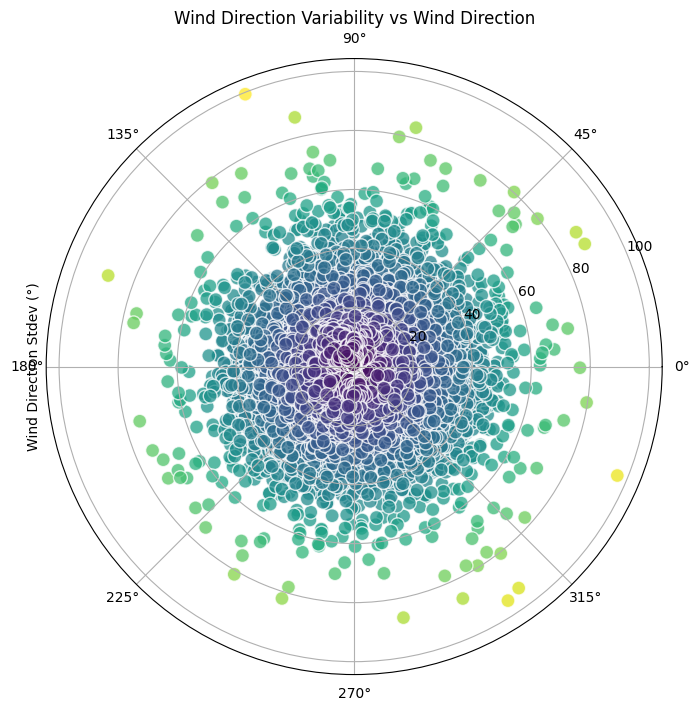

In [12]:
def plot_wind_direction_variability_polar(df, wind_direction_stdev_col='WDstdev', wind_direction_col='WD', title='Wind Direction Variability vs Wind Direction'):
    """
    Plots a polar plot of wind direction variability versus wind direction.

    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    wind_direction_stdev_col (str): Name of the column containing wind direction standard deviation values.
    wind_direction_col (str): Name of the column containing wind direction values.
    title (str): Title of the polar plot.
    """
    # Convert wind direction to radians
    wind_direction_rad = np.deg2rad(df[wind_direction_col])
    
    # Create the polar plot
    plt.figure(figsize=(10, 8))
    ax = plt.subplot(111, polar=True)
    
    # Plot wind direction variability against wind direction
    sc = ax.scatter(wind_direction_rad, df[wind_direction_stdev_col], c=df[wind_direction_stdev_col], cmap='viridis', alpha=0.75, edgecolors='w', s=100)
    ax.set_title(title)
    ax.set_ylabel('Wind Direction Stdev (°)')
    
    plt.show()

# Plot wind direction variability vs wind direction using polar plot
plot_wind_direction_variability_polar(df_benin, wind_direction_stdev_col='WDstdev', wind_direction_col='WD', title='Wind Direction Variability vs Wind Direction')


In [13]:
def calculate_correlation(df, columns):
    """
    Calculate and print correlation matrix for specified columns.

    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    columns (list of str): List of column names to include in correlation calculation.
    
    Returns:
    pd.DataFrame: Correlation matrix of specified columns.
    """
    if not all(col in df.columns for col in columns):
        raise ValueError("One or more columns are not in the DataFrame")
    
    correlations = df[columns].corr()
    print("Correlation Matrix:")
    print(correlations)
    return correlations

correlation_matrix = calculate_correlation(df_benin, ['RH', 'Tamb', 'GHI', 'DNI', 'DHI'])


Correlation Matrix:
            RH      Tamb       GHI       DNI       DHI
RH    1.000000 -0.414842 -0.360029 -0.373475 -0.285018
Tamb -0.414842  1.000000  0.547513  0.467584  0.503925
GHI  -0.360029  0.547513  1.000000  0.882376  0.849989
DNI  -0.373475  0.467584  0.882376  1.000000  0.546602
DHI  -0.285018  0.503925  0.849989  0.546602  1.000000


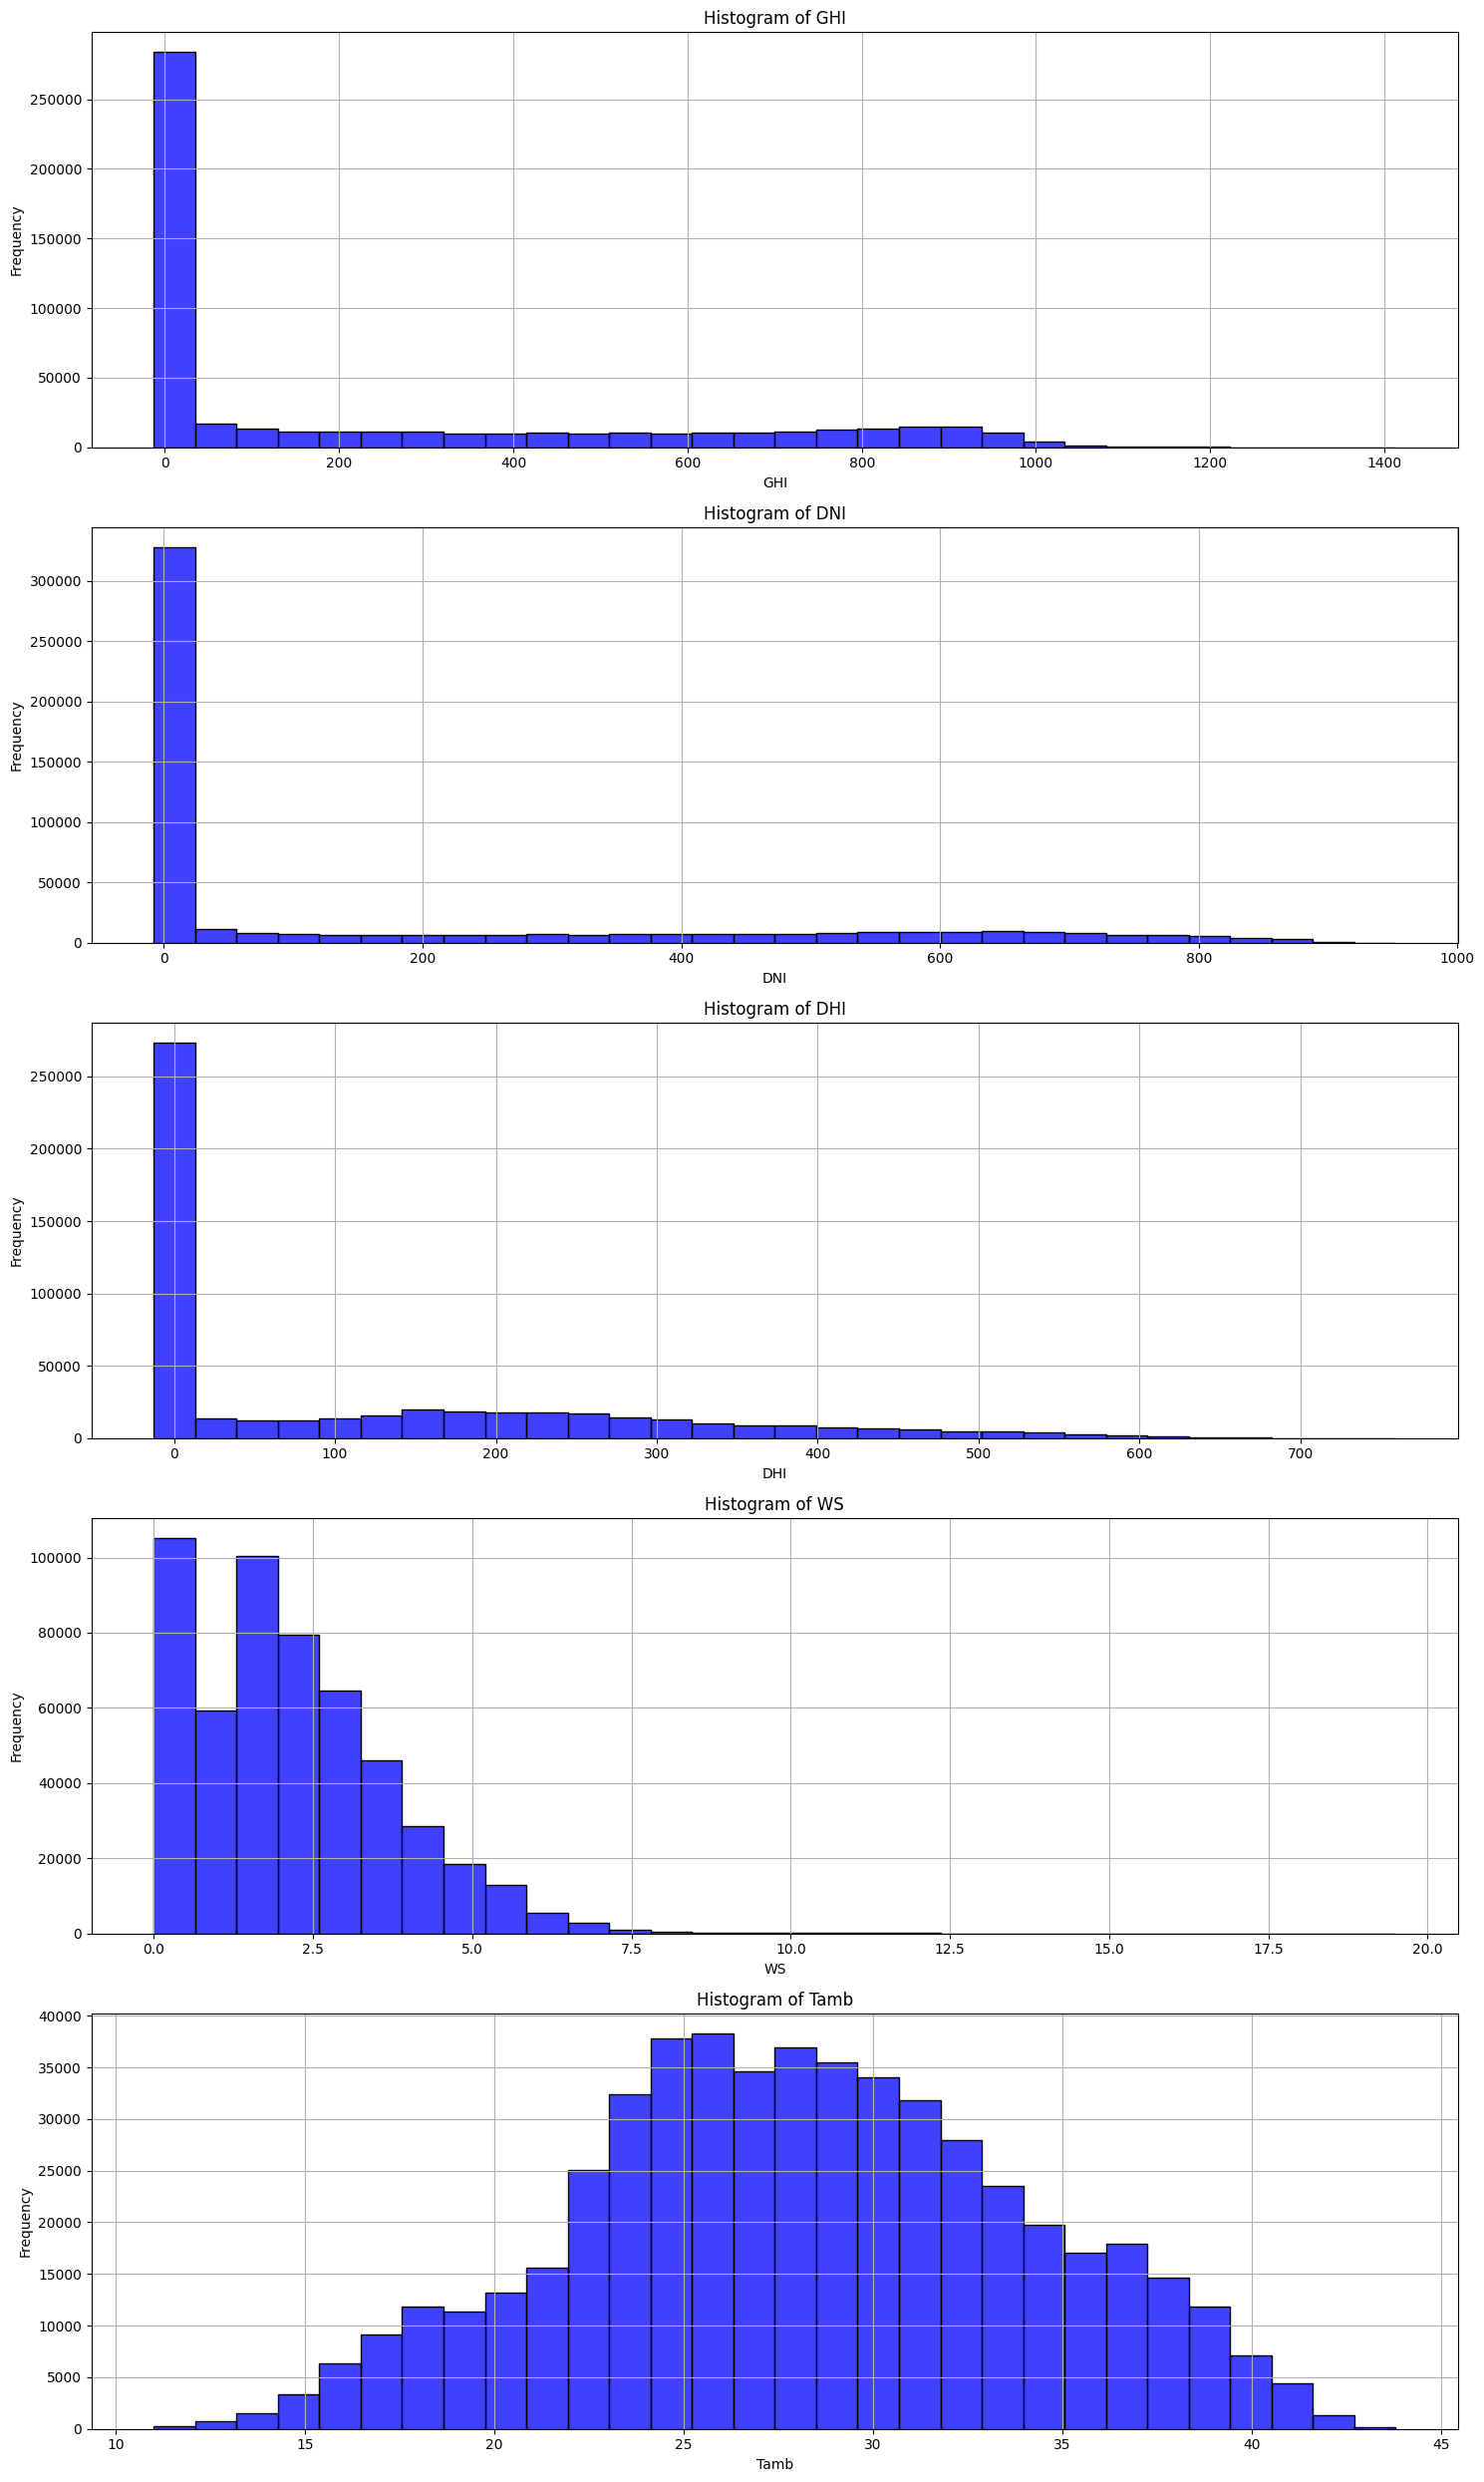

In [4]:


def plot_histograms(df, columns, bins=30):
    """
    Plots histograms for specified columns in the DataFrame.

    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    columns (list of str): List of column names to plot histograms for.
    bins (int): Number of bins for the histogram. Default is 30.
    """
    num_vars = len(columns)
    plt.figure(figsize=(15, 5 * num_vars))

    for i, col in enumerate(columns):
        plt.subplot(num_vars, 1, i + 1)
        sns.histplot(df[col], bins=bins, kde=False, color='blue')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)

    plt.tight_layout()
    plt.show()


columns_to_plot = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']

# Call the function to plot histograms
plot_histograms(df_benin, columns_to_plot)


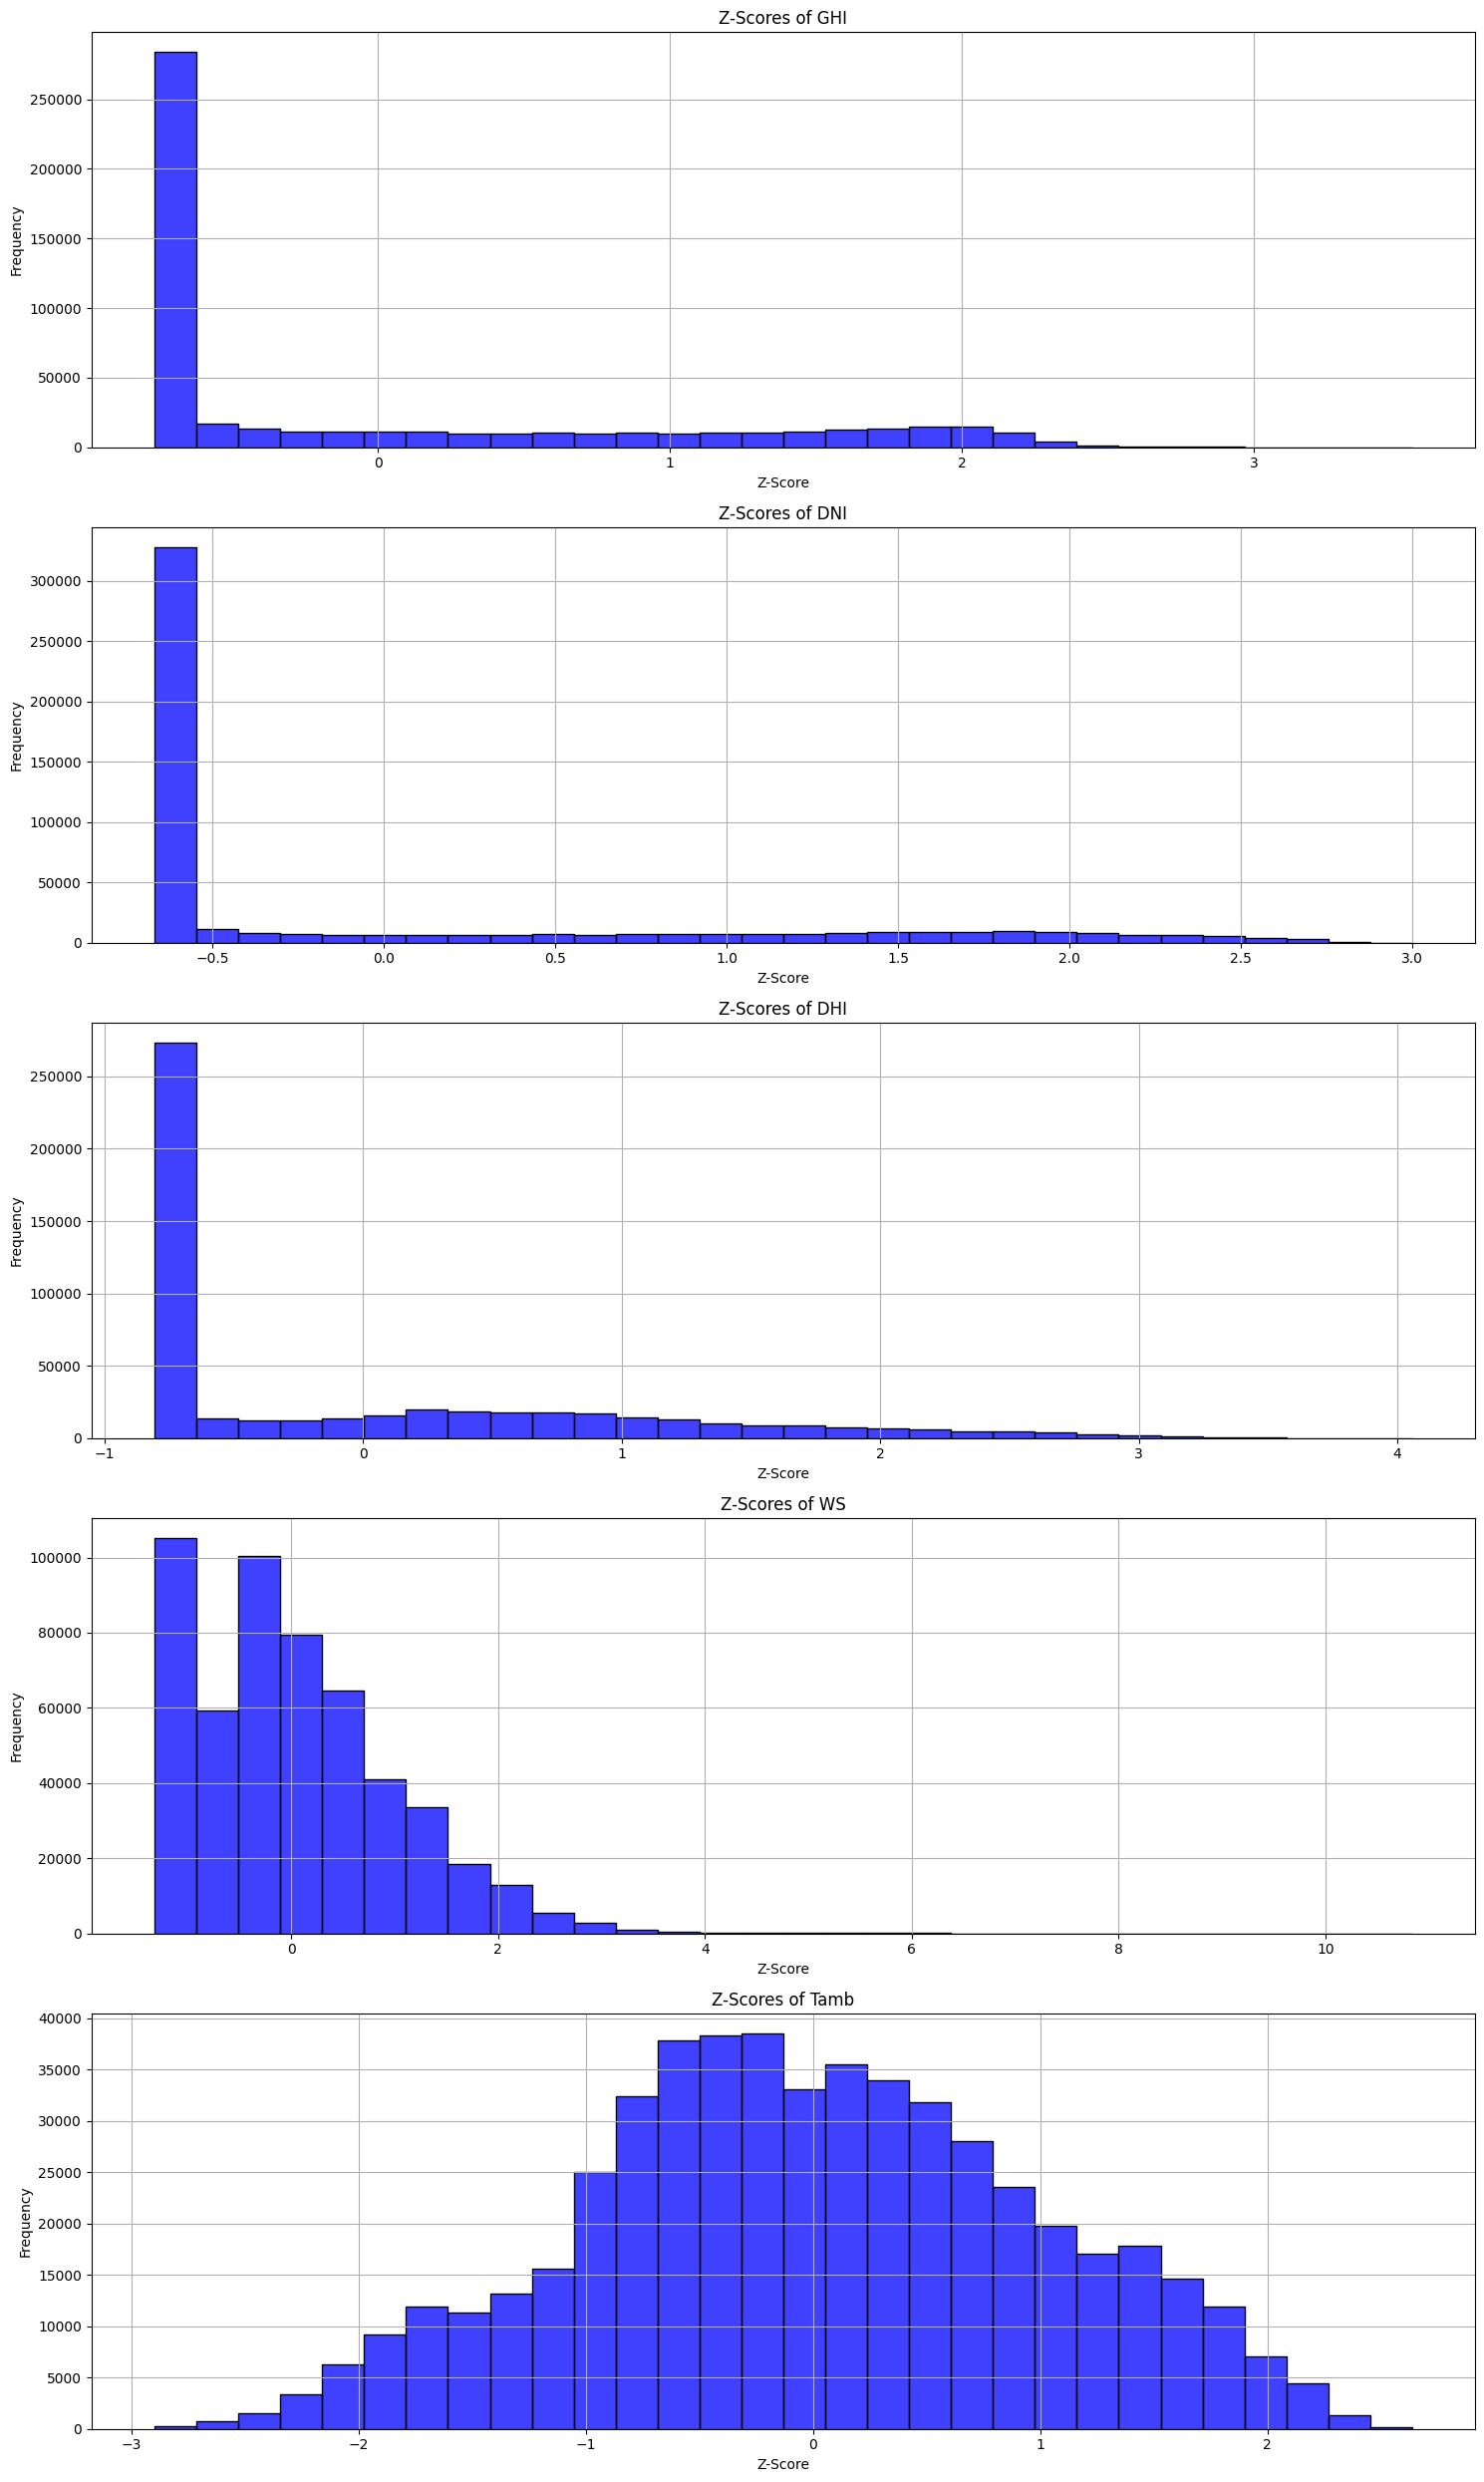

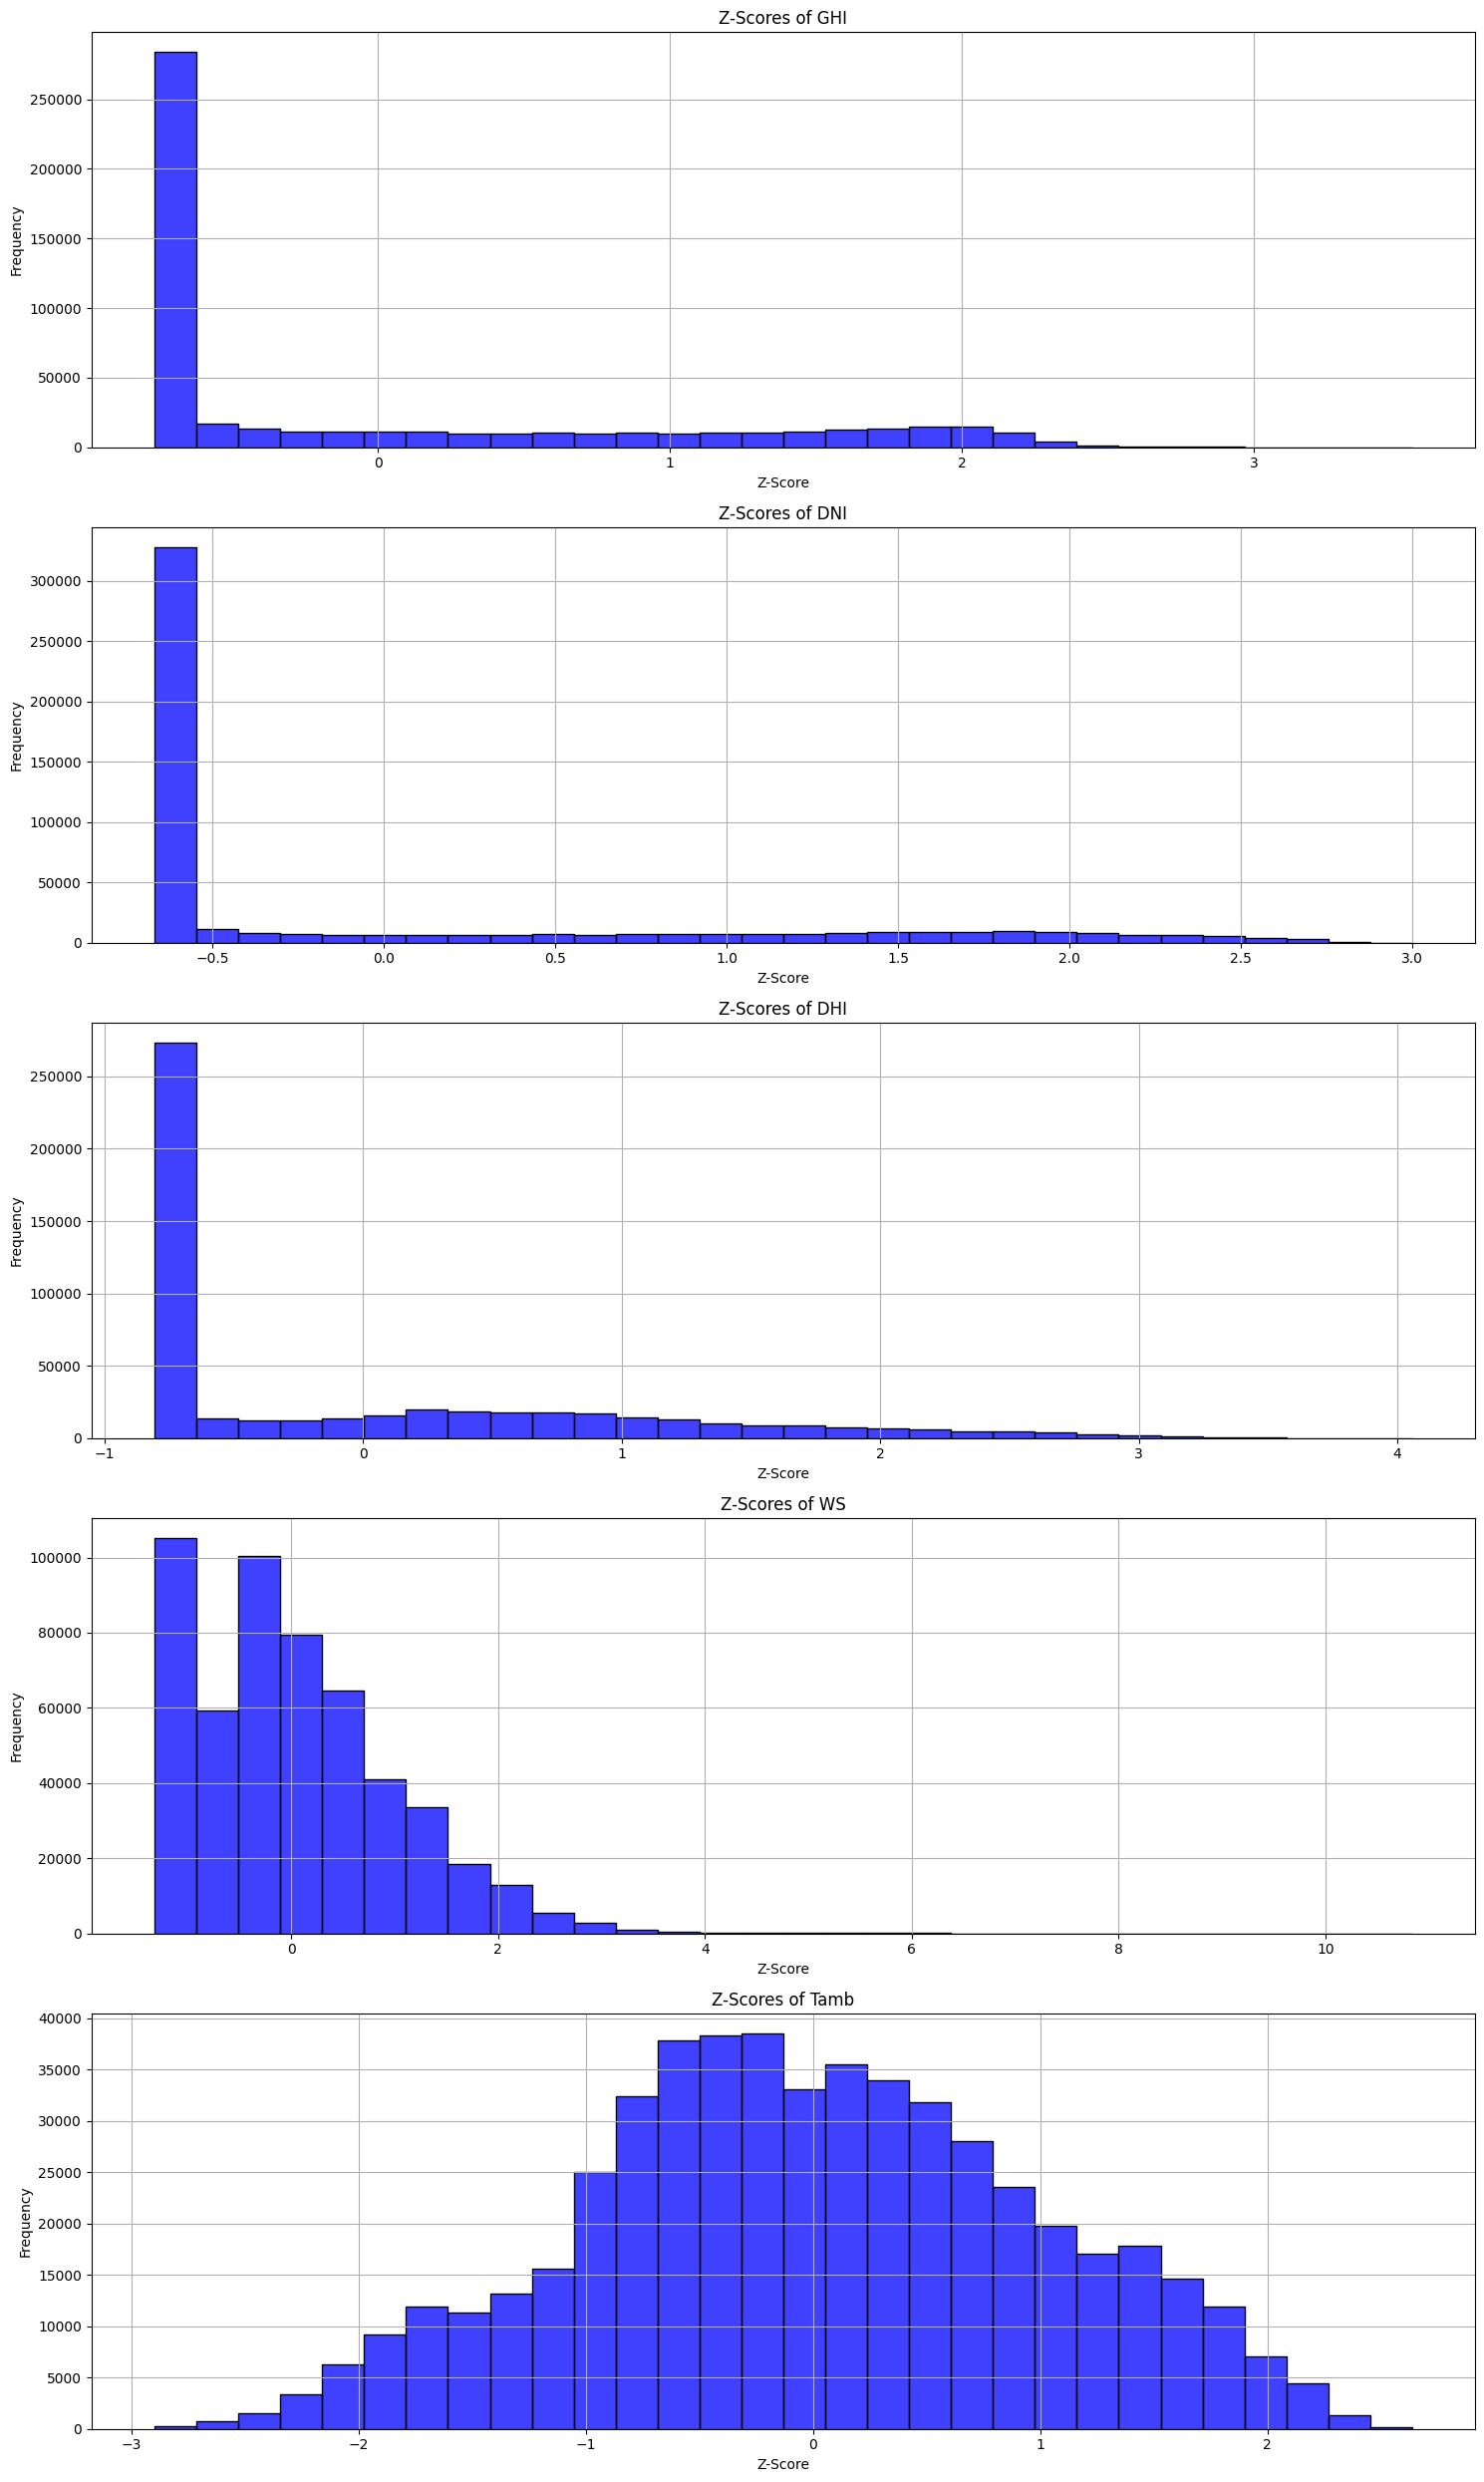

In [5]:
def calculate_z_scores(df, columns, threshold=3):
    """
    Calculate Z-scores for specified columns and flag outliers.

    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    columns (list of str): List of column names to calculate Z-scores for.
    threshold (float): Z-score threshold to flag outliers. Default is 3.

    Returns:
    pd.DataFrame: DataFrame with Z-scores and outlier flags.
    """
    df_z = df.copy()
    
    for col in columns:
        mean = df[col].mean()
        std_dev = df[col].std()
        
        # Calculate Z-scores
        df_z[f'{col}_z'] = (df[col] - mean) / std_dev
        
        # Flag outliers
        df_z[f'{col}_outlier'] = np.abs(df_z[f'{col}_z']) > threshold
    
    return df_z

def plot_z_scores(df_z, columns):
    """
    Plot Z-scores for specified columns.

    Parameters:
    df_z (pd.DataFrame): DataFrame containing Z-scores and outlier flags.
    columns (list of str): List of column names to plot Z-scores for.
    """
    plt.figure(figsize=(15, 5 * len(columns)))
    
    for i, col in enumerate(columns):
        plt.subplot(len(columns), 1, i + 1)
        sns.histplot(df_z[f'{col}_z'], bins=30, kde=False, color='blue')
        plt.title(f'Z-Scores of {col}')
        plt.xlabel('Z-Score')
        plt.ylabel('Frequency')
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Example usage
columns_to_analyze = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']
df_z = calculate_z_scores(df_benin, columns_to_analyze)
plot_z_scores(df_z, columns_to_analyze)
# Define the columns to analyze
columns_to_analyze = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']

# Calculate Z-scores and flag outliers
df_z = calculate_z_scores(df_benin, columns_to_analyze)

# Plot Z-scores
plot_z_scores(df_z, columns_to_analyze)


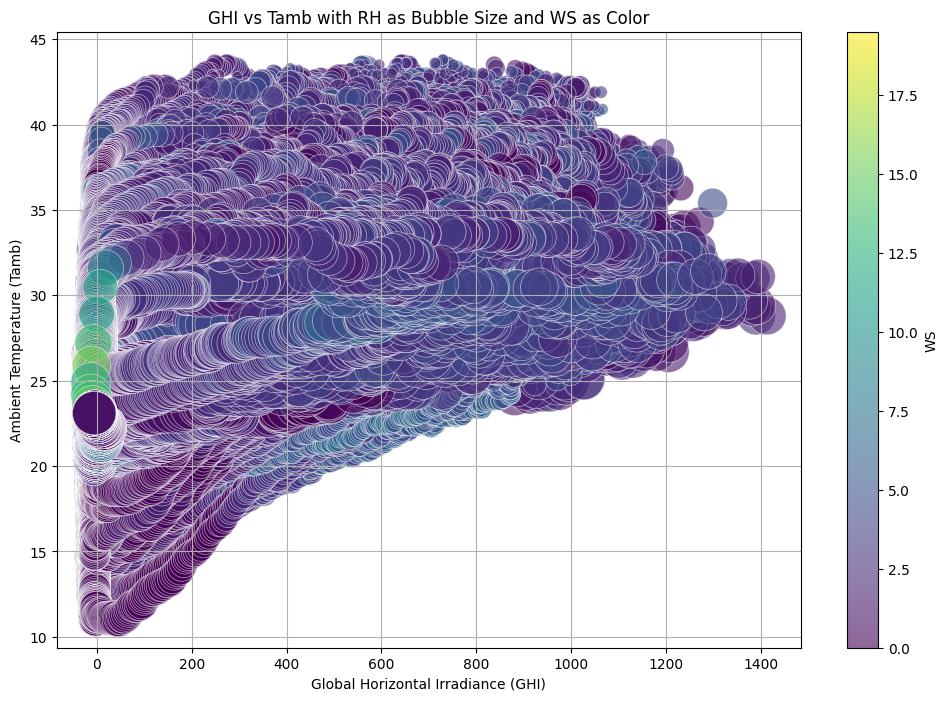

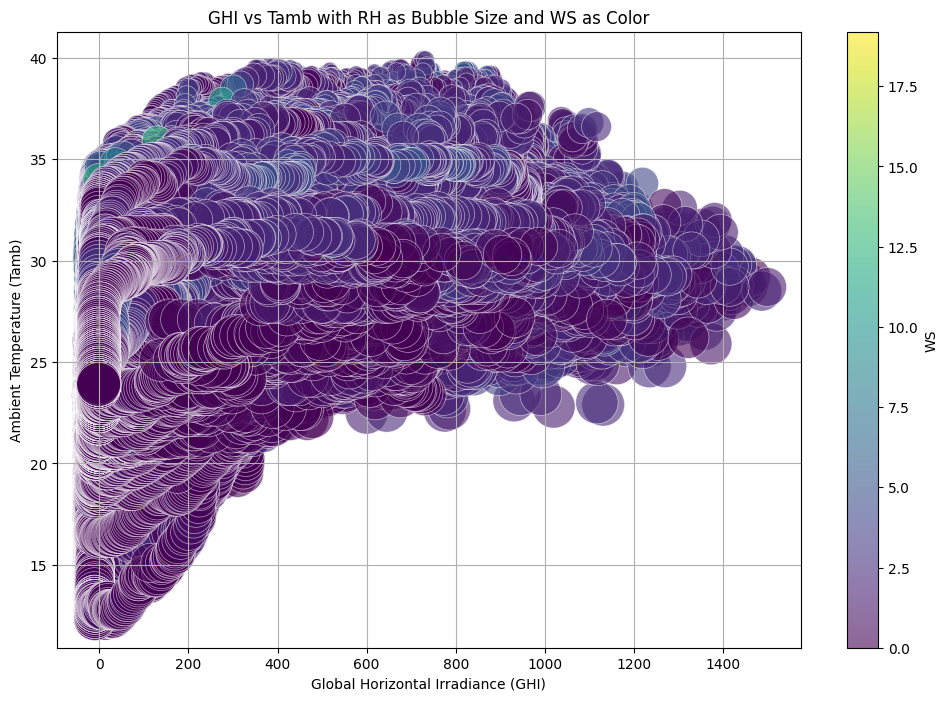

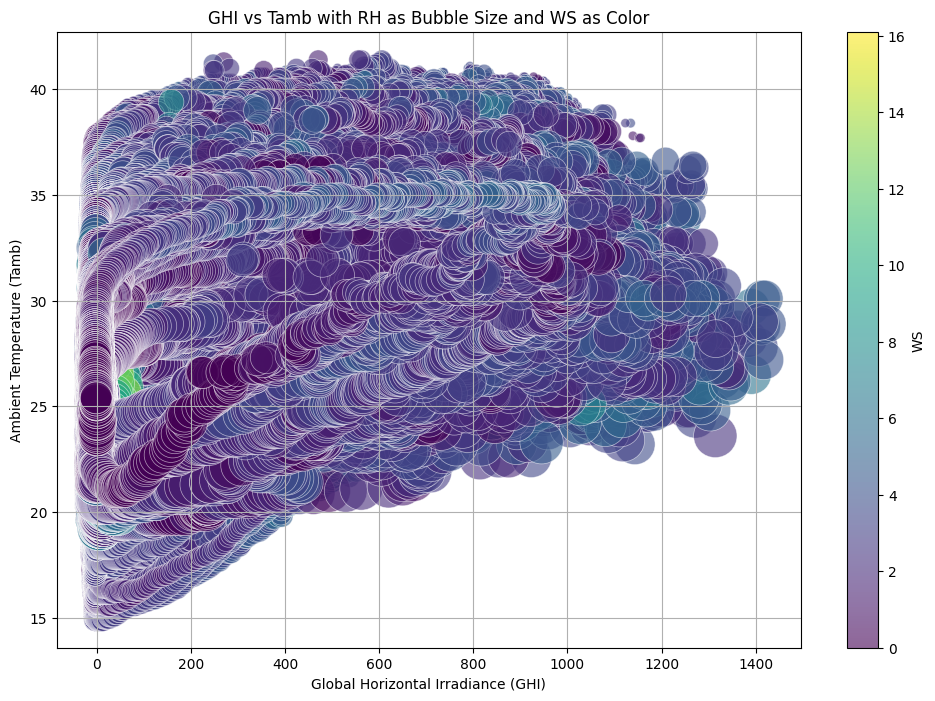

In [29]:
def plot_bubble_chart(df, x_col, y_col, size_col, color_col, title='Bubble Chart', xlabel=None, ylabel=None):
    """
    Plot a bubble chart to explore complex relationships between variables.

    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    x_col (str): Column name for x-axis.
    y_col (str): Column name for y-axis.
    size_col (str): Column name for bubble size.
    color_col (str): Column name for bubble color.
    title (str): Title of the plot. Default is 'Bubble Chart'.
    xlabel (str, optional): Label for x-axis. Default is None.
    ylabel (str, optional): Label for y-axis. Default is None.
    """
    
    plt.figure(figsize=(12, 8))
    
    # Plotting
    scatter = plt.scatter(
        df[x_col], df[y_col],
        s=df[size_col] * 10,  # Bubble size scaled by 10 for better visibility
        c=df[color_col],  # Color coding by wind speed (WS)
        cmap='viridis',
        alpha=0.6, edgecolors="w", linewidth=0.5
    )
    
    # Add color bar
    plt.colorbar(scatter, label=color_col)
    
    # Titles and labels
    plt.title(title)
    plt.xlabel(xlabel if xlabel else x_col)
    plt.ylabel(ylabel if ylabel else y_col)
    plt.grid(True)
    plt.show()

# Call the function to plot the bubble chart
plot_bubble_chart(
    df_benin, 
    x_col='GHI',  # X-axis: Global Horizontal Irradiance
    y_col='Tamb',  # Y-axis: Ambient Temperature
    size_col='RH',  # Bubble size: Relative Humidity
    color_col='WS',  # Bubble color: Wind Speed
    title='GHI vs Tamb with RH as Bubble Size and WS as Color',
    xlabel='Global Horizontal Irradiance (GHI)',
    ylabel='Ambient Temperature (Tamb)'
)
plot_bubble_chart(
    df_togo, 
    x_col='GHI',  # X-axis: Global Horizontal Irradiance
    y_col='Tamb',  # Y-axis: Ambient Temperature
    size_col='RH',  # Bubble size: Relative Humidity
    color_col='WS',  # Bubble color: Wind Speed
    title='GHI vs Tamb with RH as Bubble Size and WS as Color',
    xlabel='Global Horizontal Irradiance (GHI)',
    ylabel='Ambient Temperature (Tamb)'
)
plot_bubble_chart(
    df_sierraleone, 
    x_col='GHI',  # X-axis: Global Horizontal Irradiance
    y_col='Tamb',  # Y-axis: Ambient Temperature
    size_col='RH',  # Bubble size: Relative Humidity
    color_col='WS',  # Bubble color: Wind Speed
    title='GHI vs Tamb with RH as Bubble Size and WS as Color',
    xlabel='Global Horizontal Irradiance (GHI)',
    ylabel='Ambient Temperature (Tamb)'
)


In [23]:
def clean_data(data):
    """
    Cleans the dataset by handling missing values, removing unrealistic data,
    and converting data types.

    Parameters:
    data (str or pd.DataFrame): Path to the CSV file or DataFrame.

    Returns:
    pd.DataFrame: Cleaned DataFrame.
    """

    # Check if the input is a file path or a DataFrame
    if isinstance(data, str):
        df = pd.read_csv(data)
    elif isinstance(data, pd.DataFrame):
        df = data.copy()
    else:
        raise ValueError("Input should be a file path or a DataFrame")

    # Convert Timestamp to datetime
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

    # Drop columns that are entirely null
    df.dropna(axis=1, how='all', inplace=True)

    # Fill missing values with median for numeric columns, 'No Comment' for Comments
    fill_values = {
        'GHI': df['GHI'].median(),
        'DNI': df['DNI'].median(),
        'DHI': df['DHI'].median(),
        'ModA': df['ModA'].median(),
        'ModB': df['ModB'].median(),
        'Tamb': df['Tamb'].median(),
        'RH': df['RH'].median(),
        'WS': df['WS'].median(),
        'WSgust': df['WSgust'].median(),
        'WSstdev': df['WSstdev'].median(),
        'WD': df['WD'].median(),
        'WDstdev': df['WDstdev'].median(),
        'BP': df['BP'].median(),
        'Precipitation': df['Precipitation'].median(),
        'TModA': df['TModA'].median(),
        'TModB': df['TModB'].median(),
        'Comments': 'No Comment'
    }

    df.fillna(fill_values, inplace=True)

    # Remove unrealistic or negative values for critical columns
    df = df[(df['GHI'] >= 0) & (df['DNI'] >= 0) & (df['DHI'] >= 0) &
            (df['ModA'] >= 0) & (df['ModB'] >= 0) & (df['Tamb'] >= -50) & 
            (df['RH'] >= 0) & (df['RH'] <= 100) & (df['WS'] >= 0) &
            (df['WSgust'] >= 0) & (df['WD'] >= 0) & (df['WD'] <= 360)]

    return df

In [24]:
benin_cleaned_df = clean_data(df_benin)

# Verify data after cleaning
print(benin_cleaned_df.info())
print(benin_cleaned_df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 246878 entries, 413 to 525170
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      246878 non-null  datetime64[ns]
 1   GHI            246878 non-null  float64       
 2   DNI            246878 non-null  float64       
 3   DHI            246878 non-null  float64       
 4   ModA           246878 non-null  float64       
 5   ModB           246878 non-null  float64       
 6   Tamb           246878 non-null  float64       
 7   RH             246878 non-null  float64       
 8   WS             246878 non-null  float64       
 9   WSgust         246878 non-null  float64       
 10  WSstdev        246878 non-null  float64       
 11  WD             246878 non-null  float64       
 12  WDstdev        246878 non-null  float64       
 13  BP             246878 non-null  int64         
 14  Cleaning       246878 non-null  int64         
 15  Pre

In [25]:
togo_cleaned_df = clean_data(df_togo)

# Verify data after cleaning
print(togo_cleaned_df.info())
print(togo_cleaned_df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 238872 entries, 432 to 525227
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      238872 non-null  datetime64[ns]
 1   GHI            238872 non-null  float64       
 2   DNI            238872 non-null  float64       
 3   DHI            238872 non-null  float64       
 4   ModA           238872 non-null  float64       
 5   ModB           238872 non-null  float64       
 6   Tamb           238872 non-null  float64       
 7   RH             238872 non-null  float64       
 8   WS             238872 non-null  float64       
 9   WSgust         238872 non-null  float64       
 10  WSstdev        238872 non-null  float64       
 11  WD             238872 non-null  float64       
 12  WDstdev        238872 non-null  float64       
 13  BP             238872 non-null  int64         
 14  Cleaning       238872 non-null  int64         
 15  Pre

In [26]:
sierraleone_cleaned_df = clean_data(df_sierraleone)

# Verify data after cleaning
print(sierraleone_cleaned_df.info())
print(sierraleone_cleaned_df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 268215 entries, 342 to 525588
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      268215 non-null  datetime64[ns]
 1   GHI            268215 non-null  float64       
 2   DNI            268215 non-null  float64       
 3   DHI            268215 non-null  float64       
 4   ModA           268215 non-null  float64       
 5   ModB           268215 non-null  float64       
 6   Tamb           268215 non-null  float64       
 7   RH             268215 non-null  float64       
 8   WS             268215 non-null  float64       
 9   WSgust         268215 non-null  float64       
 10  WSstdev        268215 non-null  float64       
 11  WD             268215 non-null  float64       
 12  WDstdev        268215 non-null  float64       
 13  BP             268215 non-null  int64         
 14  Cleaning       268215 non-null  int64         
 15  Pre